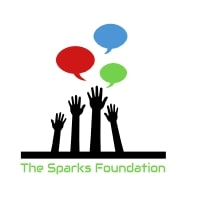

# The Sparks Foundation: Data Science & Business Analytics Internship

## Task 6 : Prediction using Decision Tree Algorithm - Iris dataset

### Author: Sudheer N Poojary
### Problem statement :

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Iris is a flowering plant with showy flowers. Our task is train a decision tree classifier model that would classify the dataset and predict the appropriate specicis for the given input. The dataset contains information about three species of this plant. so, our output must be among one of these three species

The iris dataset has four attributes namely:

sepal length
sepal width
petal length
petal width

**Target variable:** species (Iris-setosa, Iris-versicolor, Iris-virginica)

![An old rock in the desert](https://i.imgur.com/PQqYGaW.png)


In [22]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

 ## 1. Reading and Understanding the Data

In [23]:
# Reading the csv file and putting it into 'df' object.
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting the Dataset

In [24]:
#Basic Data check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
#Checking the shape of dataset
df.shape


(150, 6)

In [26]:
# Checking description of the numerical data in the DataFrame
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 2. Exploratory Data Analysis

### Data Cleaning

In [27]:
# checking null values in each rows
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
# dropping ID columns as its not relevent to further analysis.
df.drop("Id", axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization

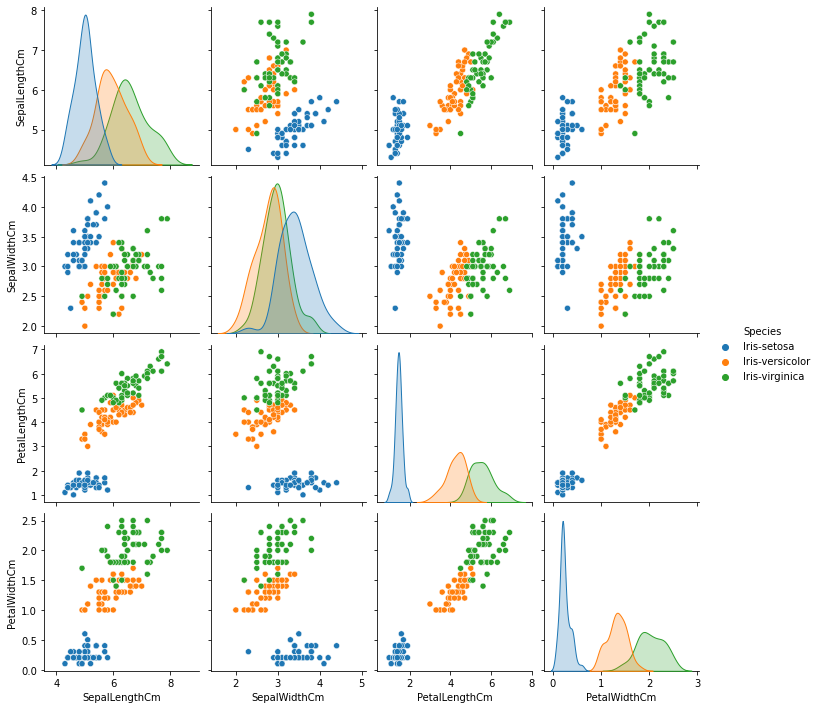

In [29]:
# Plotiing pairplot for bivariate analysis of features.
sns.pairplot(df, hue='Species')
plt.show()

### Insights:
    
- **The pairwise relationships between features in Iris-Setosa are distinctly different from those in Iris-Versicolor and Iris-Virginica.**
- **In contrast, there is an overlap in the pairwise relationships of features in Iris-Versicolor and Iris-Virginica.**
- **Therefore, it would be relatively easier to classify Iris-Setosa among the three species.**
- **However, it may be slightly harder to accurately classify Iris-Versicolor and Iris-Virginica due to their similarity in pairwise relationships.**

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


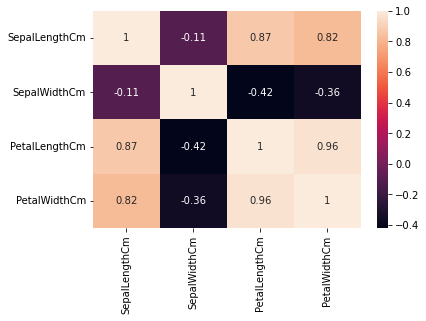

In [30]:
# To check the correlation among varibles.
print(df.corr())

sns.heatmap(df.corr(), annot=True)
plt.show()

### Insights:
- **Our observations indicate that petal length and petal width have a strong correlation with each other.**
- **In contrast, there is no significant relationship between sepal length and sepal width.**

## 3. Spliting The Data into Train & Test Data Set

In [31]:
# Importing the train_test_split function from sklearn.
from sklearn.model_selection import train_test_split

In [32]:
# Putting feature variable to X
X=df.drop("Species", axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
# Putting response variable to y
y=df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [34]:
# Split the dataset into 70% and 30% for train and test respectively.
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

## 4. Model Building

### Training the Model using Hyper-parameter tuning

In [35]:
#importing DecisionTreeClassifier class from scikit-learn.
from sklearn.tree import DecisionTreeClassifier
dt1= DecisionTreeClassifier(random_state=42)

In [36]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [37]:
# Importing GridSearchCV libraries scikit-learn.
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt1, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [38]:
# This is the part where grid search cv takes the X train and y train data
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [39]:
# Analasying different Combination of parameter Features that have been selected GridSearchCv function
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002034,1.593278e-03,0.000000,0.000000e+00,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,8
1,0.004169,3.506326e-03,0.001996,1.865948e-03,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,8
2,0.002992,6.529362e-07,0.001994,4.915125e-07,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,8
3,0.002743,4.317426e-04,0.002244,1.086911e-03,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,31
4,0.002992,5.430242e-07,0.001745,4.323965e-04,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,31


In [40]:
# Checking the top 05 results in terms of mean test score.
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
35,0.002322,0.001347,0.004037,0.005311,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
40,0.002742,0.000432,0.001496,0.000498,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
45,0.003905,0.006764,0.000000,0.000000,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
5,0.002244,0.001475,0.001496,0.000864,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,4
10,0.003905,0.006764,0.003905,0.006764,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,4


## 5. Model Evaluation

In [41]:
# Checking the best hyper parameter selected by Grid Search Cv. 
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [42]:
#Checking the score of best estimator.
grid_search.best_score_

0.9042022792022792

In [43]:
# Extracting best estimator into dt_best 
dt_best = grid_search.best_estimator_

In [44]:
    from sklearn.metrics import confusion_matrix, accuracy_score
    
    print("Train Accuracy :", accuracy_score(y_train, dt_best.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_best.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_best.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_best.predict(X_test)))

Train Accuracy : 0.9619047619047619
Train Confusion Matrix:
[[31  0  0]
 [ 0 36  1]
 [ 0  3 34]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_best.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



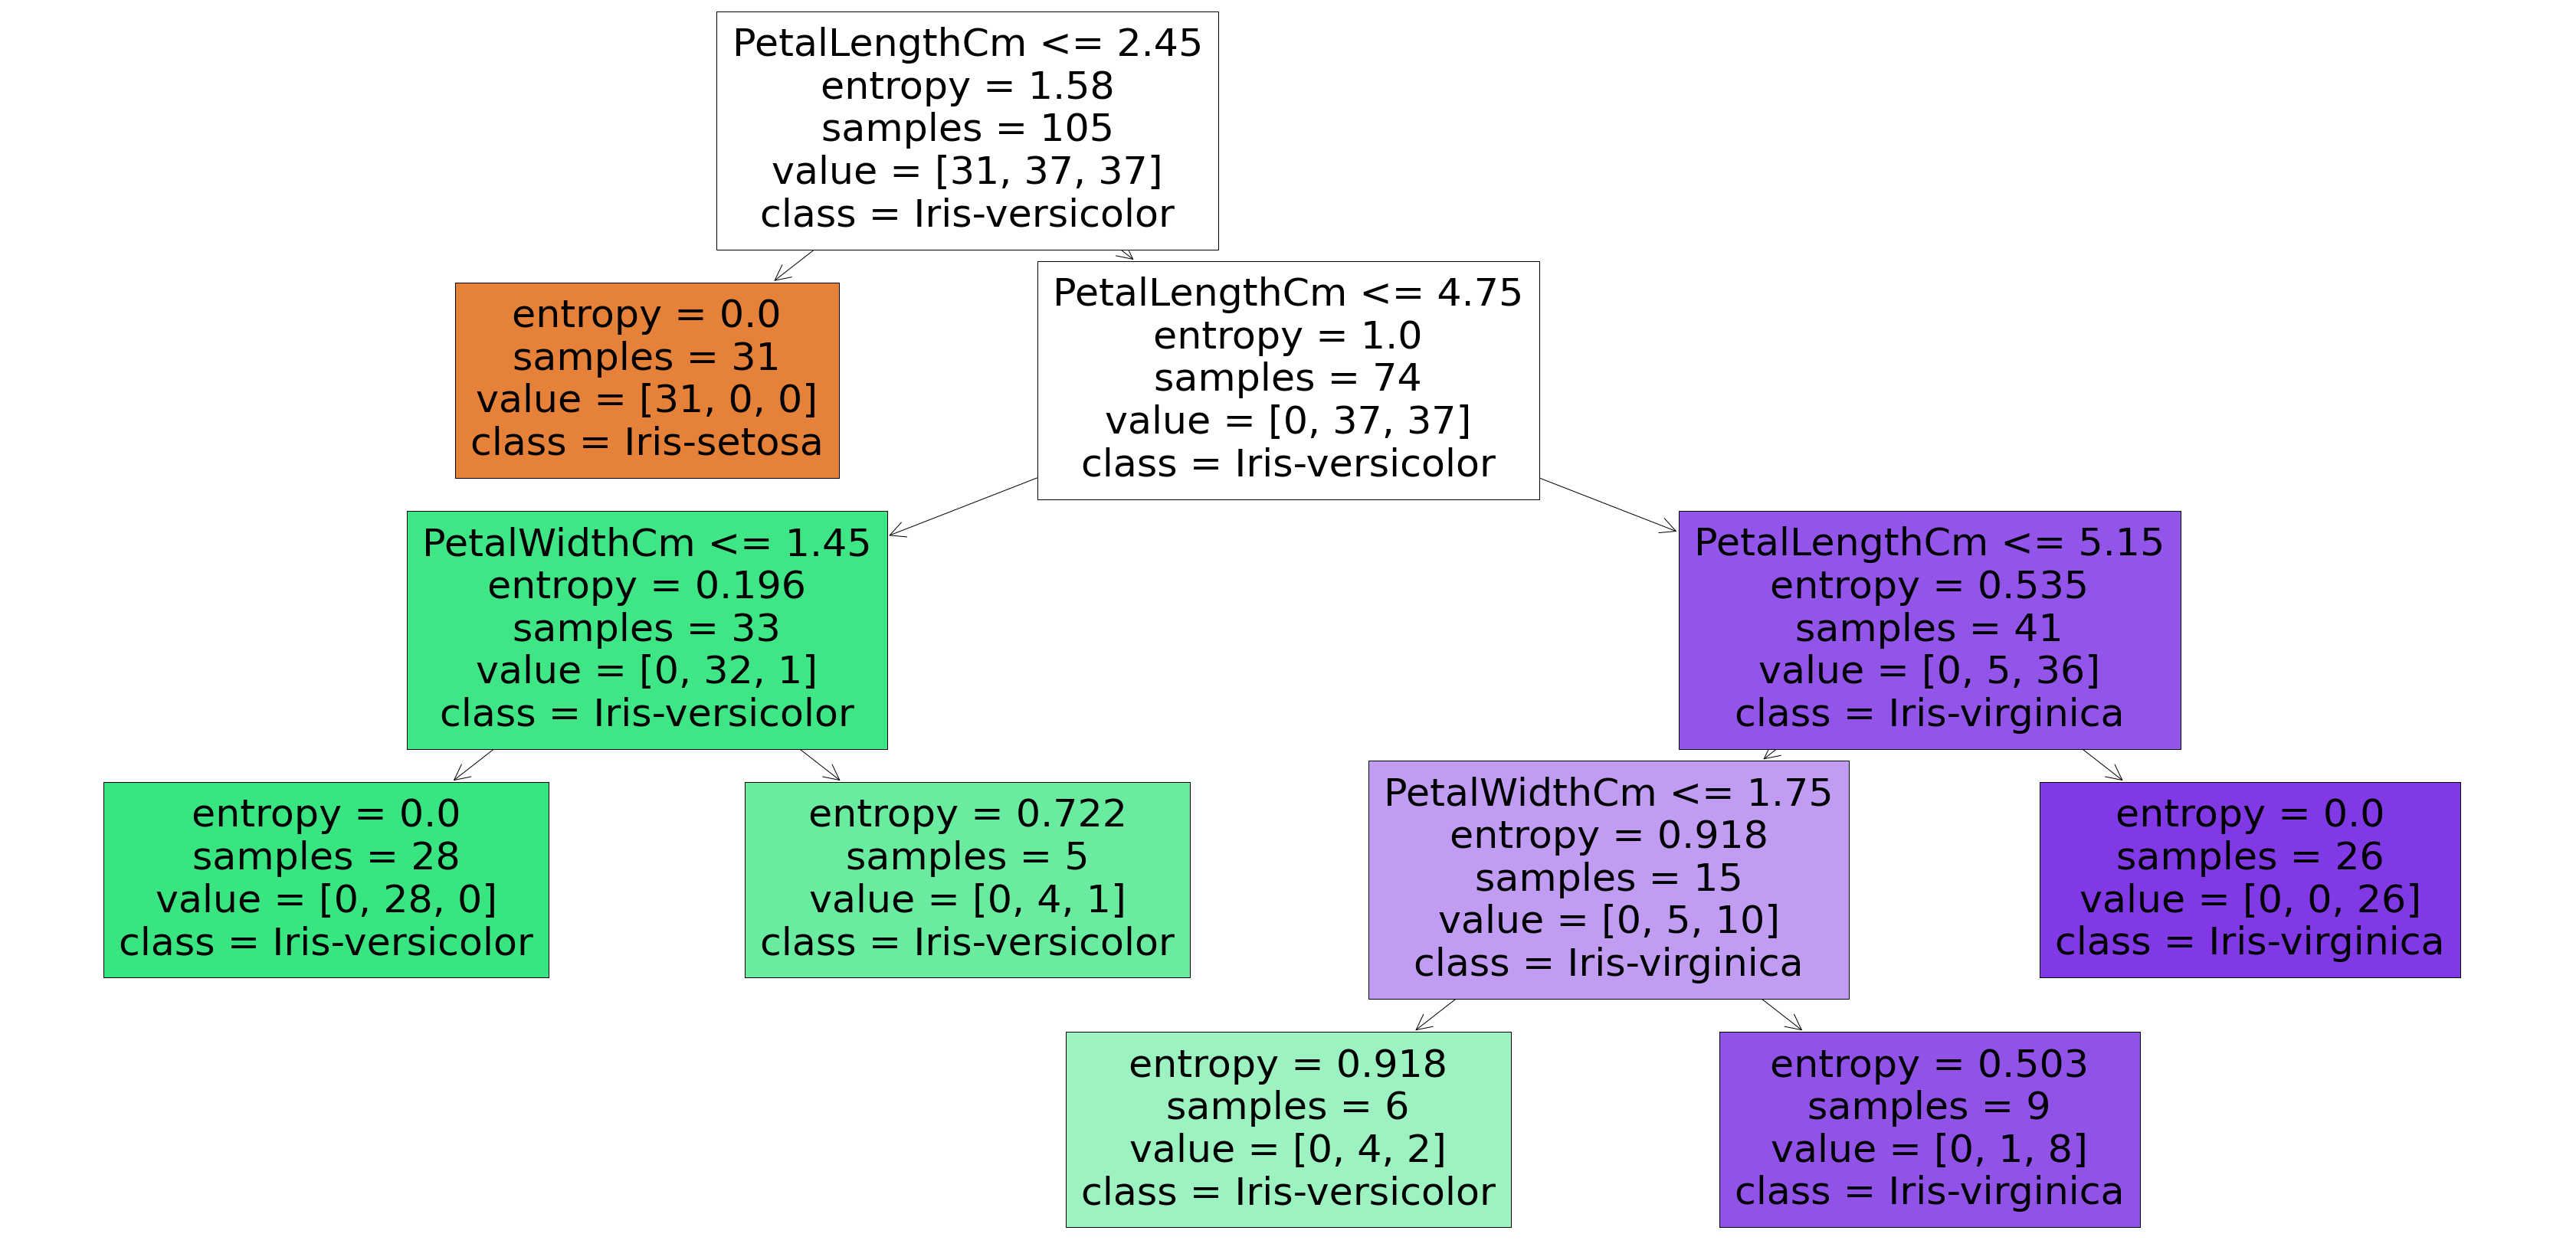

In [46]:
# Visualize the Decision Tree Classifier algorithm graph
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt_best, feature_names = X.columns,class_names=['Iris-setosa', "Iris-versicolor","Iris-virginica"],filled=True);


### Conclusion:


- **The decision tree model was evaluated using both a training dataset and a test dataset.**
- **The results of the evaluation showed an accuracy of 96% on the training dataset and 100% accuracy on the test dataset.**
- **These findings suggest that the decision tree model has effectively learned to classify data accurately and is likely to generalize well to new, unseen data.**
- **Therefore, we can have a high degree of confidence that the model will be able to predict the correct class for new data inputs.**

### Thanks for reviewing my code!!